# 영업 성공 여부 분류 경진대회

## 1. 데이터 확인

### 필수 라이브러리

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

### 데이터 셋 읽어오기

In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/LG_Aimers/train.csv") # 학습용 데이터
df_test = pd.read_csv("/content/drive/MyDrive/LG_Aimers/submission.csv") # 테스트 데이터(제출파일의 데이터)

In [ ]:
df_train.head() # 학습용 데이터 살펴보기

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,...,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted
0,1.0,/Quezon City/Philippines,AS,0.066667,32160,End-Customer,Enterprise,NaN,NaN,NaN,...,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,Engineering,0,True
1,1.0,/PH-00/Philippines,AS,0.066667,23122,End-Customer,Enterprise,12.0,NaN,NaN,...,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,Advertising,1,True
2,1.0,/Kolkata /India,AS,0.088889,1755,End-Customer,Enterprise,144.0,NaN,NaN,...,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,Construction,2,True
3,1.0,/Bhubaneswar/India,AS,0.088889,4919,End-Customer,Enterprise,NaN,NaN,NaN,...,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,IT/Software,3,True
4,1.0,/Hyderabad/India,AS,0.088889,17126,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,...,LGEIL,less than 3 months,0,0,0.003079,0.026846,corporate / office,NaN,4,True


In [ ]:
# 결측치가 있는 칼럼 확인
print(df_train.isnull().sum())

bant_submit                    0
customer_country             982
business_unit                  0
com_reg_ver_win_rate       44731
customer_idx                   0
customer_type              43961
enterprise                     0
historical_existing_cnt    45543
id_strategic_ver           55855
it_strategic_ver           58178
idit_strategic_ver         54734
customer_job               18733
lead_desc_length               0
inquiry_type                 941
product_category           19374
product_subcategory        50064
product_modelname          50070
customer_country.1           982
customer_position              0
response_corporate             0
expected_timeline          30863
ver_cus                        0
ver_pro                        0
ver_win_rate_x             40882
ver_win_ratio_per_bu       43995
business_area              40882
business_subarea           53773
lead_owner                     0
is_converted                   0
dtype: int64


In [ ]:
pip install seaborn

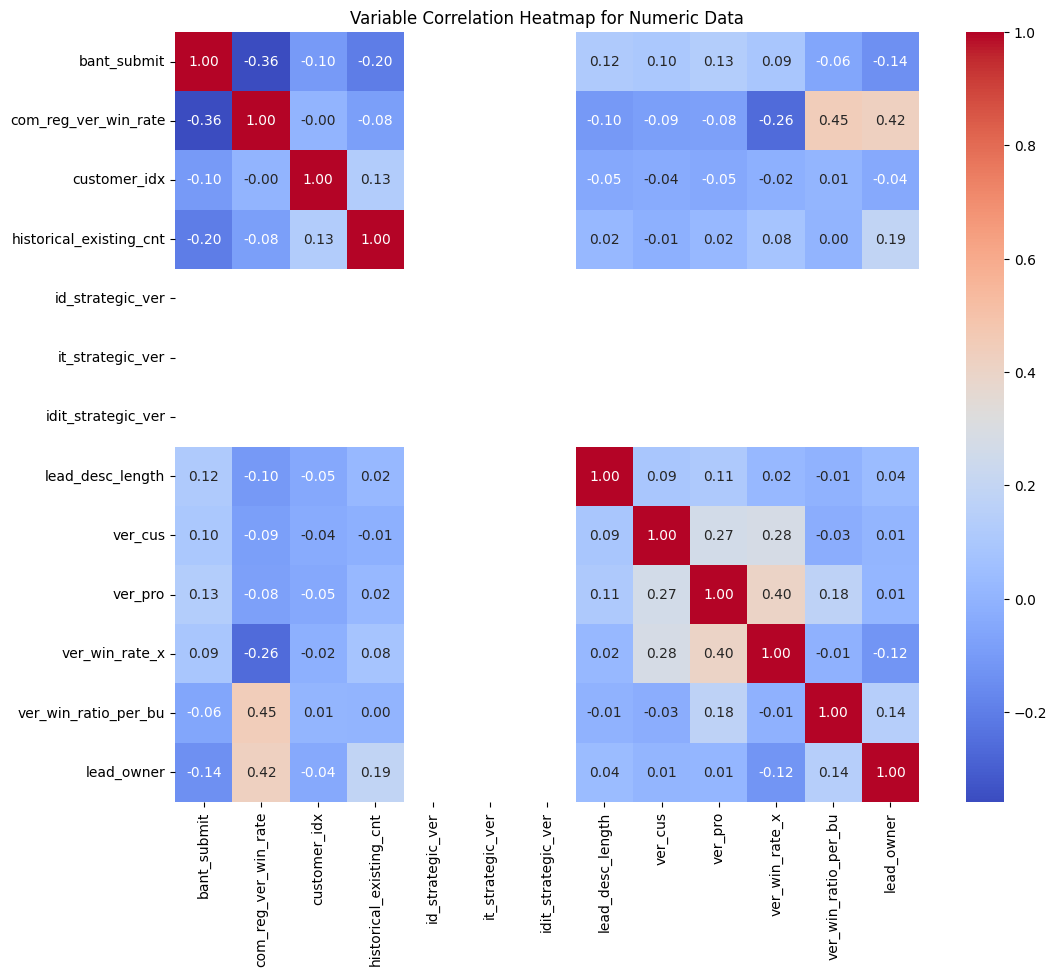

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 불러오기
data = pd.read_csv("train.csv")

# 수치형 데이터만 선택
numeric_data = data.select_dtypes(include=[int, float])

# 상관관계 계산
correlation_matrix_numeric = numeric_data.corr()

# 히트맵 생성
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_numeric, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Variable Correlation Heatmap for Numeric Data")
plt.show()


### 결측치 있는 변수 분포 확인하기

In [ ]:
# customer_country 열의 결측치를 제외한 나머지 값들의 분포 확인
nomissing_country = df_train.dropna(subset=['customer_country'])

# 분포 확인
value_counts = nomissing_country['customer_country'].value_counts()
print(value_counts)

customer_country
//India                                   3037
/São Paulo/Brazil                         1344
//United States                            962
//United Kingdom                           805
//Saudi Arabia                             718
                                          ... 
/Hydrated/India                              1
/Tirurangadi, Malappuram, Kerala/India       1
/Canoinhas / SC/Brazil                       1
/Tupã/SP/Brazil                              1
/paris/France                                1
Name: count, Length: 15399, dtype: int64


In [ ]:
# df_train 내에서 'customer_country'의 최빈값 계산
mode_value = df_train['customer_country'].mode()[0]

# df_train 내의 'customer_country' 열의 결측치를 최빈값으로 대체
df_train['customer_country'].fillna(mode_value, inplace=True)

com_reg_ver_win_rate
0.074949    1130
0.003937     803
0.073248     791
0.642857     782
0.003788     713
            ... 
0.363636      13
0.444444      12
0.400000      12
1.000000      10
0.200000       5
Name: count, Length: 80, dtype: int64


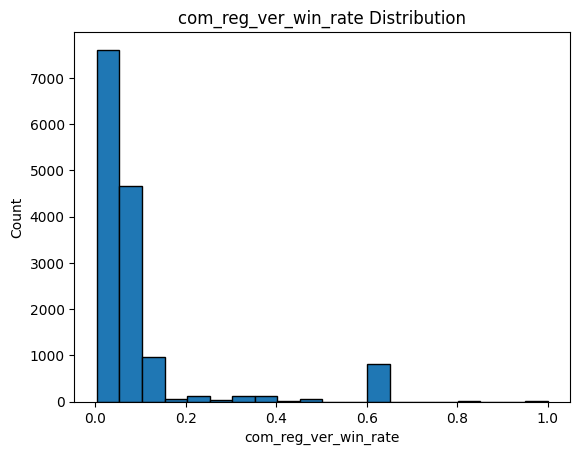

In [ ]:
# com_reg_ver_win_rate 열의 결측치를 제외한 나머지 값들의 분포 확인
nomissing_com = df_train.dropna(subset=['com_reg_ver_win_rate'])

# 분포 확인
value_counts = nomissing_com['com_reg_ver_win_rate'].value_counts()
print(value_counts)

import pandas as pd
import matplotlib.pyplot as plt

# 학습용 데이터 불러오기
df_train = pd.read_csv("train.csv")

# com_reg_ver_win_rate 열의 결측치를 제외한 나머지 값들의 분포 확인
nomissing_com = df_train.dropna(subset=['com_reg_ver_win_rate'])

# 분포 확인을 위한 히스토그램 그래프 생성
plt.hist(nomissing_com['com_reg_ver_win_rate'], bins=20, edgecolor='k')
plt.xlabel('com_reg_ver_win_rate')
plt.ylabel('Count')
plt.title('com_reg_ver_win_rate Distribution')
plt.show()

In [ ]:
# 중앙값 계산
median_value = nomissing_com['com_reg_ver_win_rate'].median()

# 결측치를 중앙값으로 대체
df_train['com_reg_ver_win_rate'].fillna(median_value, inplace=True)

In [ ]:
# customer_type 열의 결측치를 제외한 나머지 값들의 분포 확인
nomissing_type = df_train.dropna(subset=['customer_type'])

# 분포 확인
value_counts = nomissing_type['customer_type'].value_counts()
print(value_counts)

customer_type
End-Customer                    6647
End Customer                    3996
Specifier/ Influencer           2525
Channel Partner                 1368
Service Partner                  349
Solution Eco-Partner             146
Installer/Contractor              52
Specifier / Influencer            43
Corporate                         31
HVAC Engineer                     23
Engineer                          20
Developer                         17
Technician                        16
Consultant                        15
Other                             10
Home Owner                        10
End-user                           8
Manager / Director                 8
Software/Solution Provider         7
Etc.                               6
Architect/Consultant               5
Homeowner                          5
Reseller                           5
Installer                          5
Interior Designer                  5
Distributor                        4
Others                  

In [ ]:
# 최빈값 계산
mode_value = nomissing_country['customer_type'].mode()[0]

# 결측치를 최빈값으로 대체
df_train['customer_type'].fillna(mode_value, inplace=True)

historical_existing_cnt
4.0       2957
0.0       1973
1.0       1967
19.0      1441
16.0      1132
          ... 
404.0        1
145.0        1
1394.0       1
199.0        1
108.0        1
Name: count, Length: 136, dtype: int64


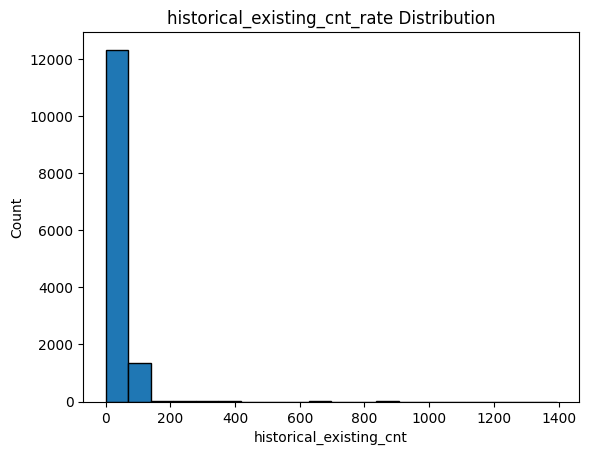

In [ ]:
# historical_existing_cnt 열의 결측치를 제외한 나머지 값들의 분포 확인
nomissing_historical = df_train.dropna(subset=['historical_existing_cnt'])

# 분포 확인
value_counts = nomissing_historical['historical_existing_cnt'].value_counts()
print(value_counts)

# 분포 확인을 위한 히스토그램 그래프 생성
plt.hist(nomissing_historical['historical_existing_cnt'], bins=20, edgecolor='k')
plt.xlabel('historical_existing_cnt')
plt.ylabel('Count')
plt.title('historical_existing_cnt_rate Distribution')
plt.show()

## customer_type에 따라 다르지 않을까?

In [ ]:
from sklearn.preprocessing import LabelEncoder

# 'customer_type' 열의 고유값 확인
unique_customer_types = df_train['customer_type'].unique()

# Label Encoder 초기화
label_encoder = LabelEncoder()

# 'customer_type' 열을 수치형으로 변환
df_train['customer_type_encoded'] = label_encoder.fit_transform(df_train['customer_type'])

In [ ]:
# 변환된 데이터로 상관관계 재계산
correlation_updated = data[['customer_type_encoded', 'historical_existing_cnt']].corr()
print(correlation_updated)

                         customer_type_encoded  historical_existing_cnt
customer_type_encoded                   1.0000                  -0.0526
historical_existing_cnt                -0.0526                   1.0000


In [ ]:
# 중앙값 계산
median_value = nomissing_com['historical_existing_cnt'].median()

# 결측치를 중앙값으로 대체
df_train['historical_existing_cnt'].fillna(median_value, inplace=True)

In [ ]:
# id_strategic_ver 열의 결측치를 제외한 나머지 값들의 분포 확인
nomissing_id = df_train.dropna(subset=['id_strategic_ver'])

# 분포 확인
value_counts = nomissing_id['id_strategic_ver'].value_counts()
print(value_counts)

id_strategic_ver
1.0    3444
Name: count, dtype: int64


In [ ]:
# 'id_strategic_ver', 'it_strategic_ver', 'idit_strategic_ver' 열의 결측치를 0으로 대체
df_train['id_strategic_ver'].fillna(0, inplace=True)
df_train['it_strategic_ver'].fillna(0, inplace=True)
df_train['idit_strategic_ver'].fillna(0, inplace=True)

# 결과 확인
print(df_train[['id_strategic_ver', 'it_strategic_ver', 'idit_strategic_ver']])

       id_strategic_ver  it_strategic_ver  idit_strategic_ver
0                   0.0               0.0                 0.0
1                   0.0               0.0                 0.0
2                   0.0               0.0                 0.0
3                   0.0               0.0                 0.0
4                   0.0               0.0                 0.0
...                 ...               ...                 ...
59294               0.0               0.0                 0.0
59295               0.0               0.0                 0.0
59296               0.0               0.0                 0.0
59297               0.0               0.0                 0.0
59298               0.0               0.0                 0.0

[59299 rows x 3 columns]


In [ ]:
# customer_job 열의 결측치를 제외한 나머지 값들의 분포 확인
nomissing_job = df_train.dropna(subset=['customer_job'])

# 분포 확인
value_counts = nomissing_job['customer_job'].value_counts()
print(value_counts)

customer_job
engineering                       6342
other                             4852
administrative                    3359
education                         2287
sales                             2218
                                  ... 
appliance specialist                 1
av estimator                         1
purchasers                           1
pricing                              1
exhibition / convention center       1
Name: count, Length: 560, dtype: int64


In [ ]:
# customer_job 열의 결측치를 "inoccupation"으로 대체
df_train['customer_job'].fillna("inoccupation", inplace=True)

# 결측치를 대체한 후 분포 확인
value_counts = df_train['customer_job'].value_counts()
print(value_counts)

## inoccupation이 제일 많아서 어떻게 처리해야 할 지 다시 고민해봐야할 것

customer_job
inoccupation                      18733
engineering                        6342
other                              4852
administrative                     3359
education                          2287
                                  ...  
appliance specialist                  1
av estimator                          1
purchasers                            1
pricing                               1
exhibition / convention center        1
Name: count, Length: 561, dtype: int64


In [ ]:
# lead_desc_length 열의 결측치를 제외한 나머지 값들의 분포 확인
nomissing_lead = df_train.dropna(subset=['lead_desc_length'])

# 분포 확인
value_counts = nomissing_lead['lead_desc_length'].value_counts()
print(value_counts)

3      10378
14      3180
2        934
10       891
4        884
       ...  
824        1
559        1
676        1
907        1
726        1
Name: lead_desc_length, Length: 909, dtype: int64


In [ ]:
# inquiry_type 열의 결측치를 제외한 나머지 값들의 분포 확인
nomissing_inquiry = df_train.dropna(subset=['inquiry_type'])

# 분포 확인
value_counts = nomissing_inquiry['inquiry_type'].value_counts()
print(value_counts)

Quotation or purchase consultation                                                                                     23274
Quotation or Purchase Consultation                                                                                     18766
Sales Inquiry                                                                                                           9977
Product Information                                                                                                     1237
Other                                                                                                                    929
                                                                                                                       ...  
quotation_                                                                                                                 1
display product                                                                                                            1


In [ ]:
# inquiry_type 열의 결측치를 제외한 나머지 값들의 분포 확인
nomissing_inquiry = df_train.dropna(subset=['inquiry_type'])

# 분포 확인
value_counts = nomissing_inquiry['inquiry_type'].value_counts()
print(value_counts)
print(value_counts.count())

Quotation or purchase consultation                                                                                     23274
Quotation or Purchase Consultation                                                                                     18766
Sales Inquiry                                                                                                           9977
Product Information                                                                                                     1237
Other                                                                                                                    929
                                                                                                                       ...  
quotation_                                                                                                                 1
display product                                                                                                            1


In [ ]:
# inquiry_type 열의 결측치를 제외한 나머지 값들의 분포 확인
nomissing_inquiry = df_train.dropna(subset=['inquiry_type'])

# 분포 확인
value_counts = nomissing_inquiry['inquiry_type'].value_counts()
print(value_counts)

Quotation or purchase consultation                                                                                     23274
Quotation or Purchase Consultation                                                                                     18766
Sales Inquiry                                                                                                           9977
Product Information                                                                                                     1237
Other                                                                                                                    929
                                                                                                                       ...  
quotation_                                                                                                                 1
display product                                                                                                            1


In [ ]:
# 최빈값 계산
mode_value = nomissing_country['inquiry_type'].mode()[0]

# 결측치를 최빈값으로 대체
df_train['inquiry_type'].fillna(mode_value, inplace=True)

In [ ]:
# product_category 열의 결측치를 제외한 나머지 값들의 분포 확인
nomissing_category = df_train.dropna(subset=['product_category'])

# 분포 확인
value_counts = nomissing_category['product_category'].value_counts()
print(value_counts)

interactive digital board                     6154
vrf                                           5640
multi-split                                   3674
video wall signage                            2029
etc.                                          2018
                                              ... 
system ac                                        1
sac                                              1
gscd046                                          1
43uh5f-h.awzm                                    1
monior/monitor tv,refrigerator,audio/video       1
Name: product_category, Length: 357, dtype: int64


In [ ]:
# 'inquiry_type', 'product_category', 'product_subcategory' 열에 Label Encoding 적용
data['inquiry_type_encoded'] = label_encoder.fit_transform(data['inquiry_type'].astype(str))
data['product_category_encoded'] = label_encoder.fit_transform(data['product_category'].astype(str))
data['product_subcategory_encoded'] = label_encoder.fit_transform(data['product_subcategory'].astype(str))

In [ ]:
# 변환된 데이터로 상관관계 재계산
correlation_for_new_vars = data[[
    'inquiry_type_encoded',
    'product_category_encoded',
    'product_subcategory_encoded'
]].corr()
print(correlation_for_new_vars)

                             inquiry_type_encoded  product_category_encoded  \
inquiry_type_encoded                     1.000000                  0.079943   
product_category_encoded                 0.079943                  1.000000   
product_subcategory_encoded              0.105434                  0.030078   

                             product_subcategory_encoded  
inquiry_type_encoded                            0.105434  
product_category_encoded                        0.030078  
product_subcategory_encoded                     1.000000  


In [ ]:
# 'inquiry_type', 'product_category', 'product_subcategory' 열에 Label Encoding 적용
df_train['inquiry_type_encoded'] = label_encoder.fit_transform(df_train['inquiry_type'].astype(str))
df_train['product_category_encoded'] = label_encoder.fit_transform(df_train['product_category'].astype(str))
df_train['product_subcategory_encoded'] = label_encoder.fit_transform(df_train['product_subcategory'].astype(str))
df_train['product_modelname_encoded'] = label_encoder.fit_transform(df_train['product_modelname'].astype(str))

In [ ]:
# 변환된 데이터로 상관관계 재계산
correlation_product = df_train[[
    'product_category_encoded',
    'product_subcategory_encoded',
    'product_modelname_encoded'
]].corr()
print(correlation_product)

                             product_category_encoded  \
product_category_encoded                     1.000000   
product_subcategory_encoded                  0.030078   
product_modelname_encoded                   -0.033312   

                             product_subcategory_encoded  \
product_category_encoded                        0.030078   
product_subcategory_encoded                     1.000000   
product_modelname_encoded                       0.565376   

                             product_modelname_encoded  
product_category_encoded                     -0.033312  
product_subcategory_encoded                   0.565376  
product_modelname_encoded                     1.000000  


In [ ]:
s# df_train 내에서 'customer_country'의 최빈값 계산
mode_value = df_train['product_category'].mode()[0]

# df_train 내의 'customer_country' 열의 결측치를 최빈값으로 대체
df_train['product_category'].fillna(mode_value, inplace=True)

In [ ]:
# product_subcategory 열의 결측치를 제외한 나머지 값들의 분포 확인
nomissing_subcategory = df_train.dropna(subset=['product_subcategory'])

# 분포 확인
value_counts = nomissing_subcategory['product_subcategory'].value_counts()
print(value_counts)

All Medical Displays         446
Interactive Digital Board    417
TR3BF Series                 374
Transparent OLED Signage     288
Diagnostic Monitors          284
                            ... 
49VL5J                         1
Versatile                      1
UM3F Series                    1
All Monitors &PCs              1
EVR                            1
Name: product_subcategory, Length: 330, dtype: int64


In [ ]:
# LabelEncoder를 사용하여 'product_category'와 'product_subcategory'를 수치형으로 변환
label_encoder_category = LabelEncoder()
label_encoder_subcategory = LabelEncoder()

data['product_category_encoded'] = label_encoder_category.fit_transform(data['product_category'].astype(str))
data['product_subcategory_encoded'] = label_encoder_subcategory.fit_transform(data['product_subcategory'].astype(str))

# 'business_subarea'에 결측치가 있는 행과 없는 행을 분리
data_with_subcategory = data.dropna(subset=['product_subcategory'])
data_without_subcategory = data[data['product_subcategory'].isna()]

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# 훈련 데이터와 테스트 데이터 준비
X = data_with_subcategory[['product_category_encoded']]
y = data_with_subcategory['product_subcategory_encoded']

# 훈련 데이터와 테스트 데이터 분할 (훈련 데이터만 사용하여 모델을 학습)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RandomForest 분류기 초기화 및 훈련
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# 'business_subarea'가 결측인 데이터에 대해 예측 수행
predicted_subcategory_encoded = rf_classifier.predict(data_without_subcategory[['product_category_encoded']])

# 예측된 수치형 'business_subarea'를 원래의 문자열 레이블로 변환
predicted_subcategory = label_encoder_subcategory.inverse_transform(predicted_subcategory_encoded)

In [ ]:
# 3단계: 예측된 'product_subcategory'로 결측치 대체
data.loc[data['product_subcategory'].isna(), 'product_subcategory'] = predicted_subcategory

In [ ]:
# product_modelname 열의 결측치를 제외한 나머지 값들의 분포 확인
nomissing_modelname = df_train.dropna(subset=['product_modelname'])

# 분포 확인
value_counts = nomissing_modelname['product_modelname'].value_counts()
print(value_counts)

UltraFine Ergo(32UN880)    523
28MQ780                    479
All Medical Displays       350
43HT3WJ                    290
55CT5WJ                    261
                          ... 
55EJ5E-B                     1
43UT662M (MEA)               1
43UM3DG                      1
32LT340C (EU)                1
55US660H (SCA)               1
Name: product_modelname, Length: 665, dtype: int64


In [ ]:
# 'product_modelname' 열에 Label Encoding 적용
data['product_modelname_encoded'] = label_encoder.fit_transform(data['product_modelname'].astype(str))

In [ ]:
# 변환된 데이터로 'product_modelname'과 'product_category' 열 사이의 상관관계 재계산
correlation_model_category = data[['product_modelname_encoded', 'product_category_encoded']].corr()
print(correlation_model_category)

                           product_modelname_encoded  product_category_encoded
product_modelname_encoded                   1.000000                 -0.033312
product_category_encoded                   -0.033312                  1.000000


In [ ]:
# 최빈값 계산
mode_value = nomissing_country['product_modelname'].mode()[0]

# 결측치를 최빈값으로 대체
df_train['product_modelname'].fillna(mode_value, inplace=True)

In [ ]:
# customer_country.1 열의 결측치를 제외한 나머지 값들의 분포 확인
nomissing_country_1 = df_train.dropna(subset=['customer_country.1'])

# 분포 확인
value_counts = nomissing_country_1['customer_country.1'].value_counts()
print(value_counts)

//India                                   3037
/São Paulo/Brazil                         1344
//United States                            962
//United Kingdom                           805
//Saudi Arabia                             718
                                          ... 
/Hydrated/India                              1
/Tirurangadi, Malappuram, Kerala/India       1
/Canoinhas / SC/Brazil                       1
/Tupã/SP/Brazil                              1
/paris/France                                1
Name: customer_country.1, Length: 15399, dtype: int64


In [ ]:
# 각 범주형 열에 Label Encoding 적용
data['customer_country_encoded'] = label_encoder.fit_transform(data['customer_country'].astype(str))
data['customer_country_1_encoded'] = label_encoder.fit_transform(data['customer_country.1'].astype(str))
data['business_area_encoded'] = label_encoder.fit_transform(data['business_area'].astype(str))
data['business_subarea_encoded'] = label_encoder.fit_transform(data['business_subarea'].astype(str))

NameError: name 'data' is not defined

In [ ]:
# 변환된 데이터로 상관관계 재계산
correlation_business = data[[
    'customer_country_encoded',
    'customer_country_1_encoded',
    'business_area_encoded',
    'business_subarea_encoded'
]].corr()
print(correlation_business)

                            customer_country_encoded  \
customer_country_encoded                    1.000000   
customer_country_1_encoded                  1.000000   
business_area_encoded                      -0.012837   
business_subarea_encoded                   -0.038088   

                            customer_country_1_encoded  business_area_encoded  \
customer_country_encoded                      1.000000              -0.012837   
customer_country_1_encoded                    1.000000              -0.012837   
business_area_encoded                        -0.012837               1.000000   
business_subarea_encoded                     -0.038088               0.179897   

                            business_subarea_encoded  
customer_country_encoded                   -0.038088  
customer_country_1_encoded                 -0.038088  
business_area_encoded                       0.179897  
business_subarea_encoded                    1.000000  


In [ ]:
# expected_timeline 열의 결측치를 제외한 나머지 값들의 분포 확인
nomissing_timeline = df_train.dropna(subset=['expected_timeline'])

# 분포 확인
value_counts = nomissing_timeline['expected_timeline'].value_counts()
print(value_counts)

expected_timeline
less than 3 months                                                                                                            17250
3 months ~ 6 months                                                                                                            5026
more than a year                                                                                                               3023
9 months ~ 1 year                                                                                                              1101
6 months ~ 9 months                                                                                                            1098
                                                                                                                              ...  
no requirement of this time                                                                                                       1
not reachable , lead shared with partner                  

In [ ]:
# 최빈값 계산
mode_value = nomissing_country['expected_timeline'].mode()[0]

# 결측치를 최빈값으로 대체
df_train['expected_timeline'].fillna(mode_value, inplace=True)

ver_win_rate_x
0.003079    4097
0.001183    3011
0.000717    2013
0.000543    1929
0.000298    1818
0.000572    1727
0.000060    1199
0.000215    1035
0.000097     650
0.000026     519
0.000013     306
0.000002     113
Name: count, dtype: int64


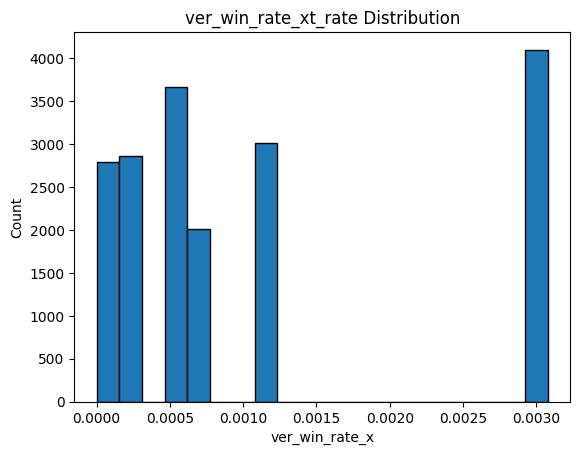

In [ ]:
# ver_win_rate_x 열의 결측치를 제외한 나머지 값들의 분포 확인
nomissing_winrate = df_train.dropna(subset=['ver_win_rate_x'])

# 분포 확인
value_counts = nomissing_winrate['ver_win_rate_x'].value_counts()
print(value_counts)

# 분포 확인을 위한 히스토그램 그래프 생성
plt.hist(nomissing_winrate['ver_win_rate_x'], bins=20, edgecolor='k')
plt.xlabel('ver_win_rate_x')
plt.ylabel('Count')
plt.title('ver_win_rate_xt_rate Distribution')
plt.show()

In [ ]:
# 중앙값 계산
median_value = nomissing_com['ver_win_rate_x'].median()

# 결측치를 중앙값으로 대체
df_train['ver_win_rate_x'].fillna(median_value, inplace=True)

ver_win_ratio_per_bu
0.064566    2460
0.049840    2028
0.020121    1365
0.048630    1356
0.026846    1278
0.064070    1075
0.071345     984
0.011583     788
0.022634     713
0.060924     540
0.079412     421
0.036913     403
0.035484     385
0.031579     271
0.053571     216
0.051471     210
0.028777     200
0.022727     173
0.128571     156
0.131148     148
0.227273      62
0.285714      43
0.034483      29
Name: count, dtype: int64


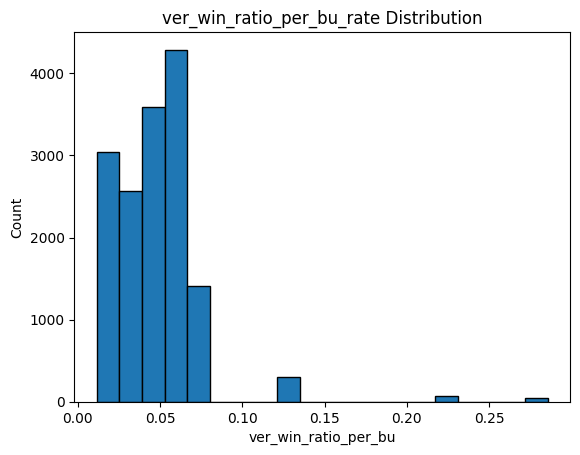

In [ ]:
# ver_win_ratio_per_bu 열의 결측치를 제외한 나머지 값들의 분포 확인
nomissing_winratio = df_train.dropna(subset=['ver_win_ratio_per_bu'])

# 분포 확인
value_counts = nomissing_winratio['ver_win_ratio_per_bu'].value_counts()
print(value_counts)

# 분포 확인을 위한 히스토그램 그래프 생성
plt.hist(nomissing_winratio['ver_win_ratio_per_bu'], bins=20, edgecolor='k')
plt.xlabel('ver_win_ratio_per_bu')
plt.ylabel('Count')
plt.title('ver_win_ratio_per_bu_rate Distribution')
plt.show()

In [ ]:
# 중앙값 계산
median_value = nomissing_com['ver_win_ratio_per_bu'].median()

# 결측치를 중앙값으로 대체
df_train['ver_win_ratio_per_bu'].fillna(median_value, inplace=True)

In [ ]:
# business_area 열의 결측치를 제외한 나머지 값들의 분포 확인
nomissing_area = df_train.dropna(subset=['business_area'])

# 분포 확인
value_counts = nomissing_area['business_area'].value_counts()
print(value_counts)

business_area
corporate / office                4097
retail                            3011
hotel & accommodation             2013
special purpose                   1929
residential (home)                1818
education                         1727
hospital & health care            1199
factory                           1035
government department              650
public facility                    519
transportation                     306
power plant / renewable energy     113
Name: count, dtype: int64


In [ ]:
# business_subarea 열의 결측치를 제외한 나머지 값들의 분포 확인
nomissing_subarea = df_train.dropna(subset=['business_subarea'])

# 분포 확인
value_counts = nomissing_subarea['business_subarea'].value_counts()
print(value_counts)

business_subarea
Others                           1740
Other Stores                      280
Hospital                          267
Manufacturing Factory / Plant     196
Construction                      191
                                 ... 
Duty Free Shop                      2
Dormitory                           1
Casino Resort                       1
Holdings                            1
Travel Agency                       1
Name: count, Length: 86, dtype: int64


In [ ]:
# df_train 내에서 'customer_country'의 최빈값 계산
mode_value = df_train['business_area'].mode()[0]

# df_train 내의 'customer_country' 열의 결측치를 최빈값으로 대체
df_train['business_area'].fillna(mode_value, inplace=True)

In [ ]:
# LabelEncoder를 사용하여 'business_area'와 'business_subarea'를 수치형으로 변환
label_encoder_area = LabelEncoder()
label_encoder_subarea = LabelEncoder()

data['business_area_encoded'] = label_encoder_area.fit_transform(data['business_area'].astype(str))
data['business_subarea_encoded'] = label_encoder_subarea.fit_transform(data['business_subarea'].astype(str))

# 'business_subarea'에 결측치가 있는 행과 없는 행을 분리
data_with_subarea = data.dropna(subset=['business_subarea'])
data_without_subarea = data[data['business_subarea'].isna()]

In [ ]:
# 훈련 데이터와 테스트 데이터 준비
X = data_with_subarea[['business_area_encoded']]
y = data_with_subarea['business_subarea_encoded']

# 훈련 데이터와 테스트 데이터 분할 (훈련 데이터만 사용하여 모델을 학습)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RandomForest 분류기 초기화 및 훈련
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# 'business_subarea'가 결측인 데이터에 대해 예측 수행
predicted_subarea_encoded = rf_classifier.predict(data_without_subarea[['business_area_encoded']])

# 예측된 수치형 'business_subarea'를 원래의 문자열 레이블로 변환
predicted_subarea = label_encoder_subarea.inverse_transform(predicted_subarea_encoded)

In [ ]:
# 3단계: 예측된 'business_subarea'로 결측치 대체
data.loc[data['business_subarea'].isna(), 'business_subarea'] = predicted_subarea

In [ ]:
# 결측치가 있는 칼럼 확인
print(df_train.isnull().sum())

bant_submit                    0
customer_country             982
business_unit                  0
com_reg_ver_win_rate           0
customer_idx                   0
customer_type                  0
enterprise                     0
historical_existing_cnt        0
id_strategic_ver               0
it_strategic_ver               0
idit_strategic_ver             0
customer_job                   0
lead_desc_length               0
inquiry_type                   0
product_category               0
product_subcategory        50064
product_modelname              0
customer_country.1           982
customer_position              0
response_corporate             0
expected_timeline              0
ver_cus                        0
ver_pro                        0
ver_win_rate_x                 0
ver_win_ratio_per_bu           0
business_area                  0
business_subarea           53773
lead_owner                     0
is_converted                   0
dtype: int64


In [ ]:
enterprise_counts = df_train['enterprise'].value_counts()
print(enterprise_counts)

Enterprise    37783
SMB           21516
Name: enterprise, dtype: int64


## 2. 데이터 전처리

### 레이블 인코딩

In [ ]:
def label_encoding(series: pd.Series) -> pd.Series:
    """범주형 데이터를 시리즈 형태로 받아 숫자형 데이터로 변환합니다."""

    my_dict = {}

    # 모든 요소를 문자열로 변환
    series = series.astype(str)

    for idx, value in enumerate(sorted(series.unique())):
        my_dict[value] = idx
    series = series.map(my_dict)

    return series

In [ ]:
# 레이블 인코딩할 칼럼들
label_columns = [
    "customer_country",
    "business_subarea",
    "business_area",
    "business_unit",
    "customer_type",
    "enterprise",
    "customer_job",
    "inquiry_type",
    "product_category",
    "product_subcategory",
    "product_modelname",
    "customer_country.1",
    "customer_position",
    "response_corporate",
    "expected_timeline",
]

df_all = pd.concat([df_train[label_columns], df_test[label_columns]])

for col in label_columns:
    df_all[col] = label_encoding(df_all[col])

다시 학습 데이터와 제출 데이터를 분리합니다.

In [ ]:
for col in label_columns:
    df_train[col] = df_all.iloc[: len(df_train)][col]
    df_test[col] = df_all.iloc[len(df_train) :][col]

### 2-2. 학습, 검증 데이터 분리

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(
    df_train.drop("is_converted", axis=1),
    df_train["is_converted"],
    test_size=0.2,
    shuffle=True,
    random_state=400,
)

## 3. 모델 학습

### 모델 정의

In [ ]:
model = DecisionTreeClassifier()

### 모델 학습

In [ ]:
model.fit(x_train.fillna(0), y_train)

DecisionTreeClassifier()

### 모델 성능 보기

In [ ]:
def get_clf_eval(y_test, y_pred=None):
    confusion = confusion_matrix(y_test, y_pred, labels=[True, False])
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, labels=[True, False])
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred, labels=[True, False])

    print("오차행렬:\n", confusion)
    print("\n정확도: {:.4f}".format(accuracy))
    print("정밀도: {:.4f}".format(precision))
    print("재현율: {:.4f}".format(recall))
    print("F1: {:.4f}".format(F1))

In [ ]:
pred = model.predict(x_val.fillna(0))
get_clf_eval(y_val, pred)

오차행렬:
 [[  732   215]
 [  268 10645]]

정확도: 0.9593
정밀도: 0.7320
재현율: 0.7730
F1: 0.7519


## RandomForestClasifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 데이터 준비
# 타겟 변수 (여기서는 'is_converted'를 예로 들었습니다)와 특성 변수를 분리
X = df_train.drop(['is_converted', 'com_reg_ver_win_rate', 'lead_desc_length'], axis=1)
y = df_train['is_converted']

# 데이터 전처리 (범주형 변수 인코딩, 결측치 처리 등)은 이미 완료되었다고 가정

# 훈련 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# 예측 수행
y_pred = rf_classifier.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'Model accuracy: {accuracy}')

Model accuracy: 0.9713322091062394


In [ ]:
from sklearn.metrics import f1_score

# F1 점수 계산
f1 = f1_score(y_test, y_pred)
print(f'Model F1 Score: {f1}')

Model F1 Score: 0.7976190476190477


## 4. 제출하기

### 테스트 데이터 예측

In [ ]:
# 예측에 필요한 데이터 분리
x_test = df_test.drop(["is_converted", "id"], axis=1)

In [ ]:
# 'com_reg_ver_win_rate'와 'lead_desc_length' 특성을 제외한 데이터로 예측 수행
x_test = x_test.drop(['com_reg_ver_win_rate', 'lead_desc_length'], axis=1, errors='ignore')
test_pred = rf_classifier.predict(x_test.fillna(0))

# True로 예측된 개수
num_positive_predictions = sum(test_pred)
print(f'Number of positive predictions: {num_positive_predictions}')

Number of positive predictions: 139


### 제출 파일 작성

In [ ]:
# 제출 데이터 읽어오기 (df_test는 전처리된 데이터가 저장됨)
df_sub = pd.read_csv("submission.csv")
df_sub["is_converted"] = test_pred

# 제출 파일 저장
df_sub.to_csv("submission.csv", index=False)

**우측 상단의 제출 버튼을 클릭해 결과를 확인하세요**